In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles

In [2]:
data_root = '/cellar/users/hsher/ontoPrune/data/'


In [3]:
term_entropy = pd.read_pickle(data_root + 'term_entropy.pickle') # contains name

In [4]:
term_entropy

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0000002,12.0,22,1.0,0.734947,mitochondrial genome maintenance,5,5
GO:0000003,5.0,1462,3.0,0.517207,reproduction,1,1
GO:0000010,2.0,2,0.0,1.000000,trans-hexaprenyltranstransferase activity,4,4
GO:0000012,12.0,13,2.0,0.969207,single strand break repair,6,8
GO:0000014,10.0,11,1.0,0.963938,single-stranded DNA endodeoxyribonuclease acti...,5,7
...,...,...,...,...,...,...,...
GO:2001295,2.0,2,0.0,1.000000,malonyl-CoA biosynthetic process,6,12
GO:2001300,1.0,6,2.0,0.772507,lipoxin metabolic process,5,9
GO:2001301,6.0,6,0.0,1.000000,lipoxin biosynthetic process,6,10
GO:2001302,2.0,2,0.0,1.000000,lipoxin A4 metabolic process,4,10


In [5]:
ent_thres = np.arange(start = 0.05, stop = 1, step = 0.05)

def load_dterm(e_thres):
    with open(data_root + "one_percent_term_{:.2f}".format(e_thres), "rb") as fp:   # Unpickling
        dterm = pickle.load(fp)
    return(dterm)

def get_names(dterm, term_entropy):
    neuron_term = term_entropy.loc[dterm['neu'], 'name']
    microglia_term = term_entropy.loc[dterm['mic'], 'name']
    return(neuron_term, microglia_term)

Text(0.5, 0.98, 'DE term overlap by different threshold')

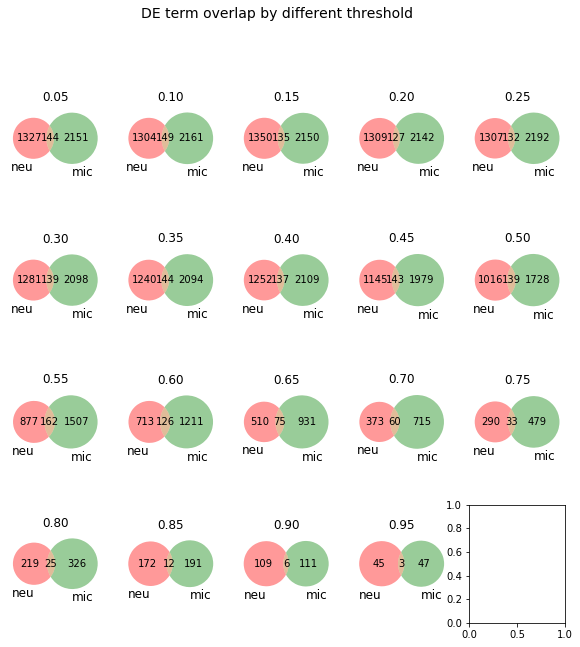

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(4,5, figsize = (10,10))
ax = ax.flatten()
i = 0
for e in ent_thres:
    dterm = load_dterm(e)
    neuron_term, microglia_term = get_names(dterm, term_entropy)
    venn2([set(neuron_term), set(microglia_term)], set_labels = ('neu', 'mic'), ax = ax[i])
    ax[i].set_title('{:.2f}'.format(e))
    i+= 1
fig.suptitle('DE term overlap by different threshold', fontsize=14)

# Visualize dterm for 95% threshold, still make sense

In [7]:
dterm = load_dterm(0.95)
neuron_term, microglia_term = get_names(dterm, term_entropy)

In [8]:
print('\t'.join(neuron_term))

peptide amidation	acetylcholinesterase activity	branched-chain-amino-acid transaminase activity	glutamate decarboxylase activity	phosphatidylserine decarboxylase activity	alpha1-adrenergic receptor activity	glutamate decarboxylation to succinate	3-oxoacid CoA-transferase activity	calcium- and calmodulin-responsive adenylate cyclase activity	ganglioside biosynthetic process via lactosylceramide	positive regulation of transcription via serum response element binding	cation:cation antiporter activity	SAP kinase activity	kinesin II complex	branchiomotor neuron axon guidance	cerebral cortex tangential migration using cell-cell interactions	filopodium	corticotropin hormone receptor binding	type 3 melanocortin receptor binding	type 4 melanocortin receptor binding	type 5 melanocortin receptor binding	histone kinase activity (H3-T6 specific)	histone H3-T6 phosphorylation	G protein-coupled receptor dimeric complex	anion binding	calcium- and calmodulin-regulated 3',5'-cyclic-GMP phosphodiesterase

In [9]:
print('\t'.join(microglia_term))

ADP receptor activity	(1->3)-beta-D-glucan binding	B-1 B cell homeostasis	purine nucleobase binding	B-1a B cell differentiation	growth plate cartilage chondrocyte development	molecular_function	beta-carotene 15,15'-monooxygenase activity	lipoprotein lipase activity	succinate-CoA ligase (ADP-forming) activity	succinate-CoA ligase (GDP-forming) activity	interferon-gamma receptor activity	Rho GDP-dissociation inhibitor activity	interleukin-1, type I receptor binding	microvillus	phosphatidylinositol 3-kinase complex, class IB	sorbitol metabolic process	prostaglandin metabolic process	biological_process	carotenoid dioxygenase activity	carotene metabolic process	xanthophyll metabolic process	superoxide-generating NADPH oxidase activity	rhombomere 5 development	cell-substrate junction	filopodium	integrin alpha2-beta1 complex	integrin alpha5-beta1 complex	integrin alphav-beta3 complex	integrin alphaL-beta2 complex	integrin alphaM-beta2 complex	purinergic nucleotide receptor signaling pathway	c

In [10]:
print('\t'.join(set(microglia_term).intersection(set(neuron_term))))

extrinsic component of presynaptic endocytic zone membrane	anion binding	filopodium


# Show how redundancy is improved

In [11]:
# 95% dterm
dterm = load_dterm(0.55)
neuron_term, microglia_term = get_names(dterm, term_entropy)
neuron_term.loc[neuron_term.str.contains('SNARE')]

GO:0000149    SNARE binding
Name: name, dtype: object

In [12]:
dterm = load_dterm(0.05)
neuron_term, microglia_term = get_names(dterm, term_entropy)
neuron_term.loc[neuron_term.str.contains('SNARE')]

GO:0000149                                    SNARE binding
GO:0031201                                    SNARE complex
GO:0035493                           SNARE complex assembly
GO:0035494                        SNARE complex disassembly
GO:0035543    positive regulation of SNARE complex assembly
GO:0035544    negative regulation of SNARE complex assembly
Name: name, dtype: object

# Network visualization Just for fun

In [13]:
from ddot import Ontology
from igraph import *
d0 = Ontology.read_pickle(data_root+'prune_go_0.90')
dterm = load_dterm(0.90)

overlap = set(dterm['neu']).intersection(dterm['mic'])
neu = set(dterm['neu'])-overlap
mic = set(dterm['mic'])-overlap

In [14]:
def visualize_de_term(ont, term_entropy, root = 'GO:0008150'):
    ig_object = ont.focus(root).unfold().to_igraph(include_genes = False)
    ig_object.vs['color'] = ['yellow' if n.split('.')[0] in neu else 'purple' if n.split('.')[0] in mic else 'pink' if  n.split('.')[0] in overlap else 'grey' for n in ig_object.vs['name']]
    #ig_object.vs['color'] = ['red' if n.split('.')[0]==root  else 'pink' for n in ig_object.vs['name']]
    ig_object.vs['size'] = [4*(2-np.log(term_entropy.loc[n.split('.')[0], 'normalized entropy']))**2 for n in ig_object.vs['name']]
    
    visual_style = {}

    visual_style["vertex_label_size"] = 6
    visual_style["edge_arrow_size"] = 0

    layout = ig_object.layout("kk")
    return(plot(ig_object, layout = layout, **visual_style))

In [17]:
d0.get_roots()

['GO:0003674', 'GO:0005575', 'GO:0008150']

Genes and Terms to keep: 18990


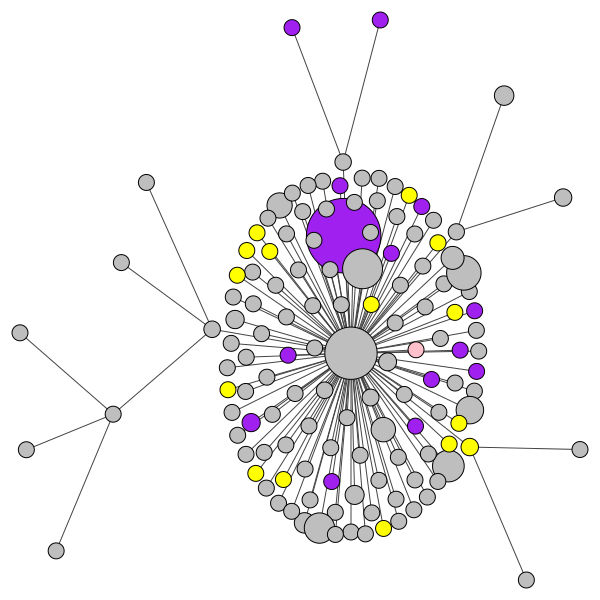

In [18]:
visualize_de_term(d0, term_entropy, 'GO:0005575')

Genes and Terms to keep: 18242


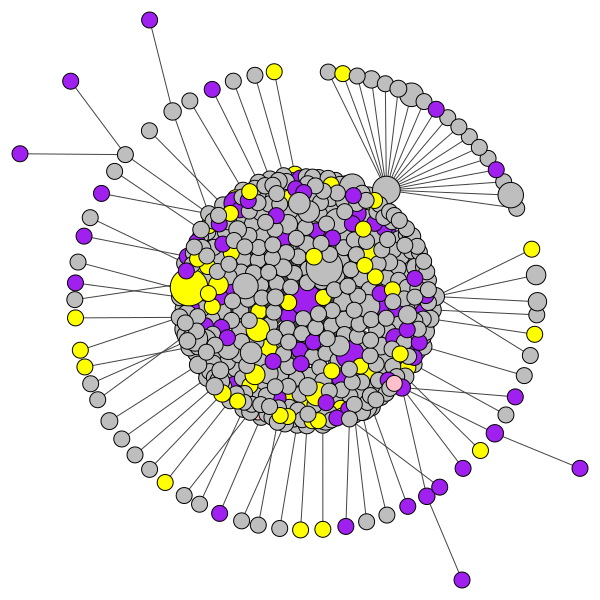

In [19]:
visualize_de_term(d0, term_entropy, 'GO:0008150')

Genes and Terms to keep: 18114


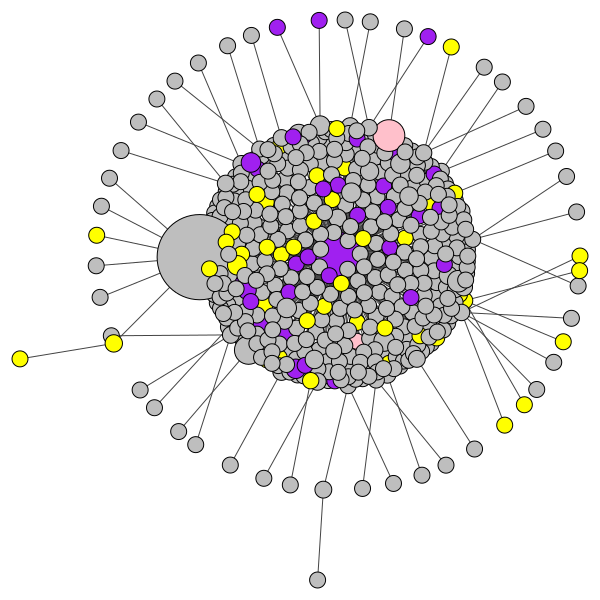

In [20]:
visualize_de_term(d0, term_entropy, 'GO:0003674')